In [52]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
import warnings

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


df = pd.read_csv('/Users/j/redwine.csv')

#Check for missing or problematic dtypes
print(df.isnull().sum())
print(df.dtypes)

# Set up variables
Y = df['quality']
X = df.drop(['quality'], axis =1)


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


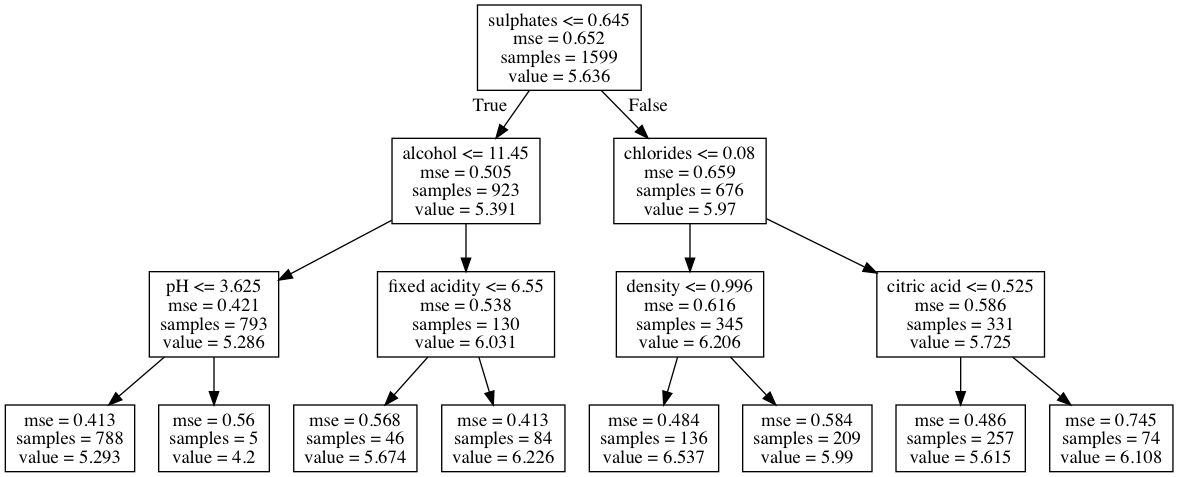

In [50]:
# Import packages
from sklearn import tree
from IPython.display import Image
import pydotplus
from pydotplus import graphviz

# Initialize and train
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3
)

regressor_tree.fit(X, Y)

# Display tree
dot_data = tree.export_graphviz(
    regressor_tree, out_file=None,
    feature_names=X.columns,
    class_names=Y,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [83]:
# Cross validation 
from sklearn.model_selection import cross_val_score
RT_scores = cross_val_score(regressor_tree, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f) " % (RT_scores.mean(), RT_scores.std() * 2))


Accuracy: 0.16 (+/- 0.11) 


In [144]:
# Import model
from sklearn import ensemble

# Simplest forest regression
forest_regression = ensemble.RandomForestClassifier(
    max_depth=1,
    max_features=1
)

FR_scores = cross_val_score(forest_regression, X, Y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f) " % (FR_scores.mean(), FR_scores.std() * 2))

Accuracy: 0.50 (+/- 0.11) 


The simplest Random Forest regressot with a depth of 1 only using 1 feature is still far more accurate than a single decision tree regressor.

## Run Times

In [147]:
import time
start_time = time.time()

#main
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3
)

regressor_tree.fit(X, Y)
RT_scores = cross_val_score(regressor_tree, X, Y, cv=5)

print("--- %s seconds ---" % (time.time() - start_time))
RT_time = time.time() - start_time

--- 0.019045114517211914 seconds ---


In [148]:
import time
#main
start_time = time.time()
forest_regression = ensemble.RandomForestClassifier(
    max_depth=1,
    max_features=1
)

FR_scores = cross_val_score(forest_regression, X, Y, cv=5)
print("--- %s seconds ---" % (time.time() - start_time))
FR_time = time.time() - start_time

--- 0.13628315925598145 seconds ---


In [157]:
RT = RT_time/len(X)
FR =FR_time/len(X)
FR/RT

7.094567130145984

The runtime of the Simplest Forest Regression + cross_val is ~7 times higher than for Regression Tree Cross_val